In [1]:
# Clear workspace
rm(list=ls())

In [2]:
# Garabage collect to help with memory issues
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,610809,32.7,1320457,70.6,1307896,69.9
Vcells,1141732,8.8,8388608,64.0,1821309,13.9


In [3]:
# Uncomment and run to install packages if needed
# install.packages("tidyverse")
# install.packages("cluster")
# install.packages("tsfeatures")
# install.packages("Rcatch22")
# install.packages("tseries")
# install.packages("factoextra")
# install.packages("forecast")
# install.packages("dtwclust")

In [4]:
library(tidyverse)
library(cluster)
library(tsfeatures)
library(Rcatch22)
library(tseries)
library(factoextra)
library(forecast)
library(dtwclust)

Warning message:
“‘timedatectl’ indicates the non-existent timezone name ‘n/a’”
Warning message:
“Your system is mis-configured: ‘/etc/localtime’ is not a symlink”
Warning message:
“It is strongly recommended to set envionment variable TZ to ‘Etc/UCT’ (or equivalent)”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Loading required package: proxy


Attaching package: ‘proxy’


The following objects are masked from ‘package:stats’:

    as.dist, dist


The following objec

In [5]:
# Create the folders to save results in
res_folder1 <- "Results/Clustering/Random/"
if (!file.exists(res_folder1)) {
 dir.create(res_folder1, recursive=TRUE)
}

res_folder2 <- "Results/Clustering/KMeans/"
if (!file.exists(res_folder2)) {
 dir.create(res_folder2, recursive=TRUE)
}

res_folder3 <- "Results/Clustering/DTW/"
if (!file.exists(res_folder3)) {
 dir.create(res_folder3, recursive=TRUE)
}

# Read In and Subset Data

In [6]:
# Read in all files from the Data/Processed directory
england_fnames <- list.files("Data/Processed/Highways_England/", pattern="*.csv", full.names=TRUE)
england_df_list <- lapply(england_fnames, read_csv)

portland_fnames <- list.files("Data/Processed/Portland/", pattern="*.csv", full.names=TRUE)
portland_df_list <- lapply(portland_fnames, read_csv)

utah_fnames <- list.files("Data/Processed/Utah/", pattern="*.csv", full.names=TRUE)
utah_df_list <- lapply(utah_fnames, read_csv)

Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delim

Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delim

Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delim

Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delim

Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delim

Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35040 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delim

In [7]:
# Ensure that the rows in each data frame are in proper chronological order 
england_df_list <- lapply(england_df_list, function(x) x %>% arrange(timestamp))
portland_df_list <- lapply(portland_df_list, function(x) x %>% arrange(timestamp))
utah_df_list <- lapply(utah_df_list, function(x) x %>% arrange(timestamp))    

In [8]:
# Create one list of all data frames
total_df_list <- append(append(england_df_list, portland_df_list), utah_df_list)

In [9]:
# Grab the csv of starting and ending points for sampling each time series

start_end_points <- read_csv('start_end_points.csv')
starting_points <- start_end_points$start
ending_points <- start_end_points$end

Rows: 76 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [10]:
# For each df in our list, create a row number column called 'rn' - this will allow us to find the starting point
# for each sample using the above starting_points array
total_df_list <- lapply(total_df_list, function(x) x %>% mutate(rn = row_number()))

In [11]:
# Sample each df in the list according to its corresponding starting and ending point - this creates 12-week
# long samples of each data frame which will be used for modeling and testing
total_df_list_samples <- lapply(1:length(total_df_list), 
                                function(x) total_df_list[[x]] %>% 
                                    filter(rn >= starting_points[x]) %>%
                                    filter(rn <= ending_points[x]))

In [12]:
# Add a new column to each data frame to denote whether each row should be part of the training set, validation set
# or test set - the first 8 weeks are designated as train, the next 2 as val, and the final 2 as test. It may be 
# the case that train and val get used for training, depending on the modeling task
total_df_list_samples <- lapply(total_df_list_samples, 
                                function(x) x %>% mutate(rn = row_number()) %>%
                                    mutate(train_val_test = ifelse(rn <= (96*7*8), 
                                                                   "train", 
                                                                   ifelse(rn <= (96*7*10), 
                                                                          "val", 
                                                                          "test")))
                                
                               )

In [13]:
# Create a list of data frames which only have the training and validation rows of each df
train_val_samples <- lapply(total_df_list_samples, function(x) x %>% filter(train_val_test != "test"))

In [14]:
# Create a list of data frames which only have the training rows of each df
train_samples <- lapply(total_df_list_samples, function(x) x %>% filter(train_val_test == "train"))

In [15]:
# Create a list of data frames which only have the test rows of each df
test_samples <- lapply(total_df_list_samples, function(x) x %>% filter(train_val_test == "test"))

In [16]:
# Get the target field (total_volume) from the dfs in the above lists and create msts objects instead of dfs
train_val_samples_ts <- lapply(train_val_samples, 
                               function(x) msts(x$total_volume, seasonal.periods=c(24*4, 24*4*7)))

In [17]:
# Get the target field (total_volume) from the dfs in the above lists and create msts objects instead of dfs
train_samples_ts <- lapply(train_samples, 
                           function(x) msts(x$total_volume, seasonal.periods=c(24*4, 24*4*7)))

In [18]:
# Get the target field (total_volume) from the dfs in the above lists and create msts objects instead of dfs
test_samples_ts <- lapply(test_samples,
                          function(x) msts(x$total_volume, seasonal.periods=c(24*4, 24*4*7)))

# Random Cluster Assignments
We will start with random cluster assignments - we will create 4 as 76 is easily divisble by 4, allowing for equal sized clusters

In [19]:
# Total number of time series in the data set
total_clust <- 1:length(train_samples_ts)

In [20]:
# Randomly sample from the total number of time series, removing previously sampled values and sampling without
# replacement each time to create 4 unique clusters
set.seed(54321)
clust1 <- sample(total_clust, length(train_samples_ts)/4, replace=FALSE)
set.seed(54321)
clust2 <- sample(total_clust[-clust1], length(train_samples_ts)/4, replace=FALSE)
set.seed(54321)
clust3 <- sample(total_clust[-c(clust1,clust2)], length(train_samples_ts)/4, replace=FALSE)
set.seed(54321)
clust4 <- sample(total_clust[-c(clust1,clust2,clust3)], length(train_samples_ts)/4, replace=FALSE)

In [21]:
# Sanity check the clusters
clust1

[1] 41 49 39 58 46 51 62 26 15 37 69 11 67 53 30 13 16 72 74

In [22]:
clust2

[1] 59 54 64 65 14 50 25 56 19 60 32 73 63 47 76 61 12 57 36

In [23]:
clust3

[1] 18 31 22 40 70 66  5 55 23 68 21 17 52 71 20 45 43  7 29

In [24]:
clust4

[1] 34 24 44  2 33  9  6 28 27  3 75 35 42  8 38  1  4 10 48

In [25]:
# Assign each ts_index to its respective cluster
random_clust_assignments <- c()
for (idx in total_clust){
    if (idx %in% clust1){
        assign <- 1
    }
    
    else if (idx %in% clust2){
        assign <- 2
    }
    
    else if (idx %in% clust3){
        assign <- 3
    }

    else if (idx %in% clust4){
        assign <- 4
    }
    random_clust_assignments <- c(random_clust_assignments, assign)
}

# Save assignments in a data frame
random_clust_df <- data.frame(ts_index=total_clust, random_clust_assign=random_clust_assignments)

In [26]:
# Write the random clusters to a CSV
write.csv(random_clust_df, "Results/Clustering/Random/random_clustering_assign.csv", row.names=FALSE)

# Catch22 Based Feature Computation
In this section, we utilize the Catch22 feature computation framework for computing time series features for clustering

In [27]:
# For each train time series in our list, compute the Catch22 features using the catch22_all function 
# and save the results in a df
train_catch22_feat <- lapply(lapply(train_samples_ts, function(x) catch22_all(x)), 
                             function(x) x %>% 
                                 pivot_wider(names_from=names, values_from=values))

Warning message:
“As of 0.1.14 the feature 'CO_f1ecac' returns a double instead of int
This warning is displayed once per session.”


In [28]:
# Create a dataframe of the catch22 features plus mean and variance where each row corresponds to one time series
train_catch22_feat_df <- do.call("rbind", train_catch22_feat)

In [29]:
# Sanity check by printing df head
head(train_catch22_feat_df)

DN_HistogramMode_5,DN_HistogramMode_10,CO_f1ecac,CO_FirstMin_ac,CO_HistogramAMI_even_2_5,CO_trev_1_num,MD_hrv_classic_pnn40,SB_BinaryStats_mean_longstretch1,SB_TransitionMatrix_3ac_sumdiagcov,PD_PeriodicityWang_th0_01,⋯,FC_LocalSimple_mean1_tauresrat,DN_OutlierInclude_p_001_mdrmd,DN_OutlierInclude_n_001_mdrmd,SP_Summaries_welch_rect_area_5_1,SB_BinaryStats_diff_longstretch0,SB_MotifThree_quantile_hh,SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1,SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1,SP_Summaries_welch_rect_centroid,FC_LocalSimple_mean3_stderr
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.9218226,-1.148470,13.82386,48,0.7703660,0.0023764235,0.7365581,55,0.007384888,95,⋯,0.36363636,0.03218006,-0.024925595,0.9887043,15,1.472521,0.4081633,0.3265306,0.06596117,0.2699762
-1.0160128,-1.230913,16.25543,48,0.7362338,-0.0015322646,0.7856744,61,0.023279508,95,⋯,0.04166667,0.04389881,-0.001302083,0.9768737,15,1.515340,0.4489796,0.3469388,0.06519418,0.2904009
-0.9109971,-1.118617,16.70035,48,0.7820858,0.0021162446,0.7389767,60,0.007085068,95,⋯,0.04166667,0.03218006,-0.021763393,0.9825842,20,1.526881,0.4285714,0.3673469,0.06519418,0.2591757
-0.8799034,-1.093104,14.82659,48,0.7899539,0.0028058063,0.6803721,55,0.002621771,95,⋯,0.43478261,-0.05747768,0.007068452,0.9892416,18,1.430336,0.4285714,0.3469388,0.06596117,0.2620395
-0.9038058,-1.100202,17.63207,48,0.8039572,0.0041442076,0.6682791,54,0.003598341,95,⋯,0.52000000,0.02027530,-0.017578125,0.9910389,22,1.417460,0.4285714,0.3469388,0.06519418,0.2157951
-0.9946967,-1.207999,17.64684,48,0.8148260,0.0003571444,0.7205581,64,0.004398774,95,⋯,0.04000000,0.02994792,-0.022321429,0.9901210,18,1.428618,0.4285714,0.3469388,0.06519418,0.2194032


In [30]:
# Print and examine the summary
summary(train_catch22_feat_df)

 DN_HistogramMode_5 DN_HistogramMode_10   CO_f1ecac      CO_FirstMin_ac 
 Min.   :-1.2146    Min.   :-1.5185     Min.   : 9.688   Min.   :24.00  
 1st Qu.:-0.9886    1st Qu.:-1.2141     1st Qu.:15.152   1st Qu.:48.00  
 Median :-0.8918    Median :-1.1209     Median :16.214   Median :48.00  
 Mean   :-0.6055    Mean   :-0.9360     Mean   :15.894   Mean   :47.04  
 3rd Qu.:-0.6440    3rd Qu.:-0.9796     3rd Qu.:17.082   3rd Qu.:48.00  
 Max.   : 1.1815    Max.   : 1.0095     Max.   :19.284   Max.   :49.00  
 CO_HistogramAMI_even_2_5 CO_trev_1_num        MD_hrv_classic_pnn40
 Min.   :0.2940           Min.   :-0.0217085   Min.   :0.6160      
 1st Qu.:0.6754           1st Qu.: 0.0002076   1st Qu.:0.7126      
 Median :0.7424           Median : 0.0025954   Median :0.7516      
 Mean   :0.7154           Mean   : 0.0022936   Mean   :0.7617      
 3rd Qu.:0.8027           3rd Qu.: 0.0051715   3rd Qu.:0.8040      
 Max.   :0.8648           Max.   : 0.0147870   Max.   :0.9485      
 SB_BinarySta

In [31]:
# Check for features where the lower and upper quantiles and median are identical - these likely do not provide
# enough useful information to include them for clustering
rownames(data.frame(t(sapply(train_catch22_feat_df, function(i) quantile(i, c(0.25, 0.5, 0.75))))) %>%
    mutate(is_lower_equal_med = ifelse(X25.==X50., TRUE, FALSE)) %>%
    mutate(is_upper_equal_med = ifelse(X50.==X75., TRUE, FALSE)) %>%
    mutate(all_same = is_lower_equal_med+is_upper_equal_med) %>%
    filter(all_same==2))

[1] "CO_FirstMin_ac"            "PD_PeriodicityWang_th0_01"

In [32]:
# Remove features with too little variation
train_catch22_feat_df <- train_catch22_feat_df %>% select(-c('CO_FirstMin_ac', 'PD_PeriodicityWang_th0_01'))

In [33]:
write.csv(train_catch22_feat_df, "Results/Clustering/KMeans/catch22_feat_df.csv")

In [34]:
# Scale features to unit interval per Catch22 paper - first make a copy of the df
train_catch22_feat_df_scaled <- train_catch22_feat_df

In [35]:
# Next, for each feature in the data frame, compute the min and max and 
# scale by subtracting the min and dividing by the range
for (n in 1:ncol(train_catch22_feat_df_scaled)){
    min_n <- min(train_catch22_feat_df_scaled[,n])
    max_n <- max(train_catch22_feat_df_scaled[,n])
    train_catch22_feat_df_scaled[,n] <- (train_catch22_feat_df_scaled[,n] - min_n)/(max_n - min_n)
}

In [36]:
summary(train_catch22_feat_df_scaled)

 DN_HistogramMode_5 DN_HistogramMode_10   CO_f1ecac     
 Min.   :0.00000    Min.   :0.0000      Min.   :0.0000  
 1st Qu.:0.09434    1st Qu.:0.1204      1st Qu.:0.5694  
 Median :0.13474    Median :0.1573      Median :0.6801  
 Mean   :0.25420    Mean   :0.2304      Mean   :0.6467  
 3rd Qu.:0.23816    3rd Qu.:0.2132      3rd Qu.:0.7705  
 Max.   :1.00000    Max.   :1.0000      Max.   :1.0000  
 CO_HistogramAMI_even_2_5 CO_trev_1_num    MD_hrv_classic_pnn40
 Min.   :0.0000           Min.   :0.0000   Min.   :0.0000      
 1st Qu.:0.6682           1st Qu.:0.6005   1st Qu.:0.2906      
 Median :0.7856           Median :0.6659   Median :0.4079      
 Mean   :0.7382           Mean   :0.6577   Mean   :0.4381      
 3rd Qu.:0.8912           3rd Qu.:0.7365   3rd Qu.:0.5653      
 Max.   :1.0000           Max.   :1.0000   Max.   :1.0000      
 SB_BinaryStats_mean_longstretch1 SB_TransitionMatrix_3ac_sumdiagcov
 Min.   :0.0000                   Min.   :0.0000                    
 1st Qu.:0.6919

## K-Means Clustering with Catch22 Features

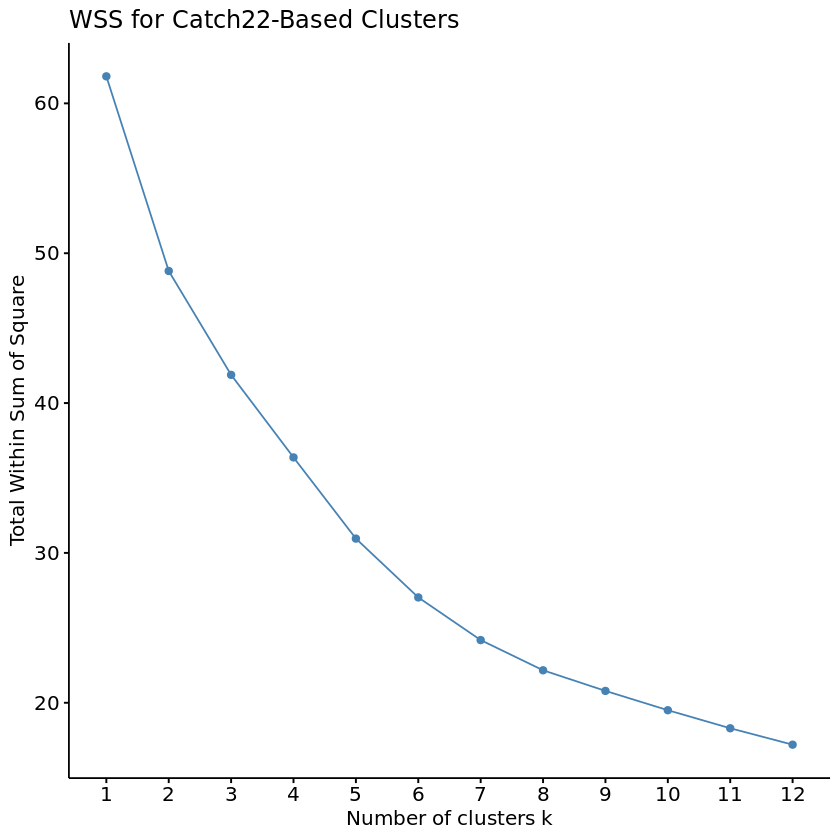

In [37]:
# Eblow Method based on WSS
set.seed(54321)
wss_catch22 <- fviz_nbclust(train_catch22_feat_df_scaled, 
             kmeans, 
             method = "wss", 
             k.max=12, 
             iter.max=1000, 
             nstart=100, 
             algorithm="Hartigan-Wong") + 
labs(title="WSS for Catch22-Based Clusters")

wss_catch22 # No clear best number, maybe 2?

In [38]:
ggsave("Results/Clustering/KMeans/wss_catch22.png", wss_catch22, width=10, height=5)

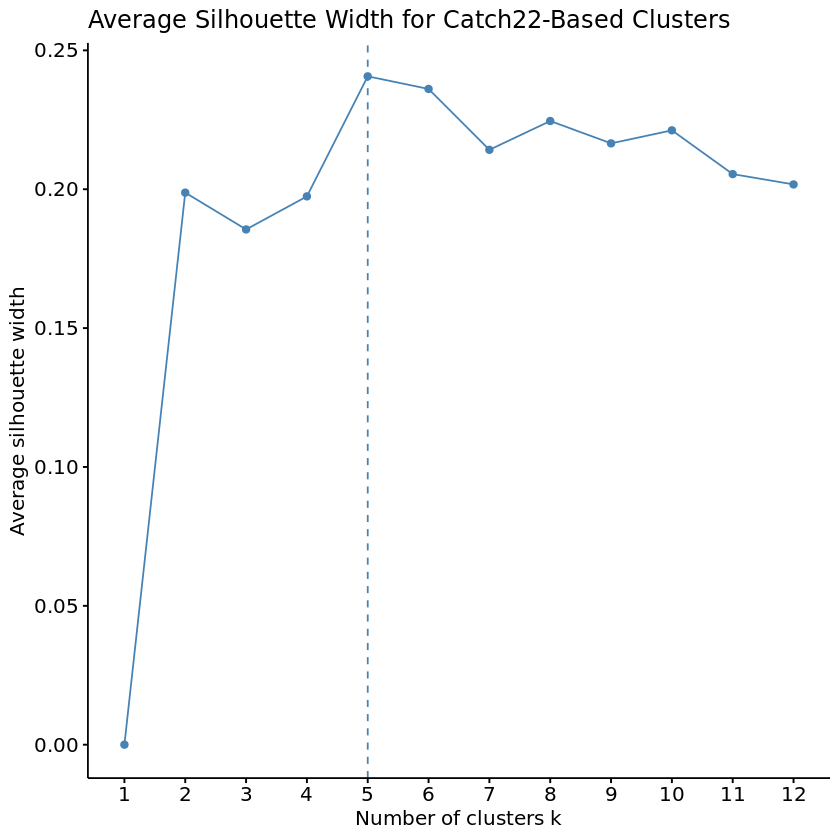

In [39]:
# Let's try the silhouette method instead
set.seed(54321)
sil_catch22 <- fviz_nbclust(train_catch22_feat_df_scaled, 
             kmeans, 
             method="silhouette", 
             k.max=12, 
             iter.max=10000, 
             nstart=500, 
             algorithm="Hartigan-Wong", 
            ) + 
labs(title="Average Silhouette Width for Catch22-Based Clusters")

sil_catch22 # Much clearer indication of 2 being the best, with 3 also looking reasonable

In [40]:
ggsave("Results/Clustering/KMeans/sil_catch22.png", sil_catch22, width=10, height=5)

In [41]:
# Let's examine the sillouhettes for K=5 and K=6 more closely. First, we create both sets of clusters
k1 <- 5
k2 <- 6

set.seed(54321)
kmeans_clust1 <- kmeans(train_catch22_feat_df_scaled, k1, iter.max=10000, nstart=500, algorithm="Hartigan-Wong") 
set.seed(54321)
kmeans_clust2 <- kmeans(train_catch22_feat_df_scaled, k2, iter.max=10000, nstart=500, algorithm="Hartigan-Wong") 

In [42]:
# Next, we compute the distance or dissimilarity matrix of the Catch22 features, to be used for visualizaing the 
# cluster silouhettes to make a final choice on the number of clusters
D <- dist(train_catch22_feat_df_scaled) # daisy(train_catch22_feat_df_scaled)

In [43]:
sil_catch22_k1 <- silhouette(kmeans_clust1$cluster, D) 

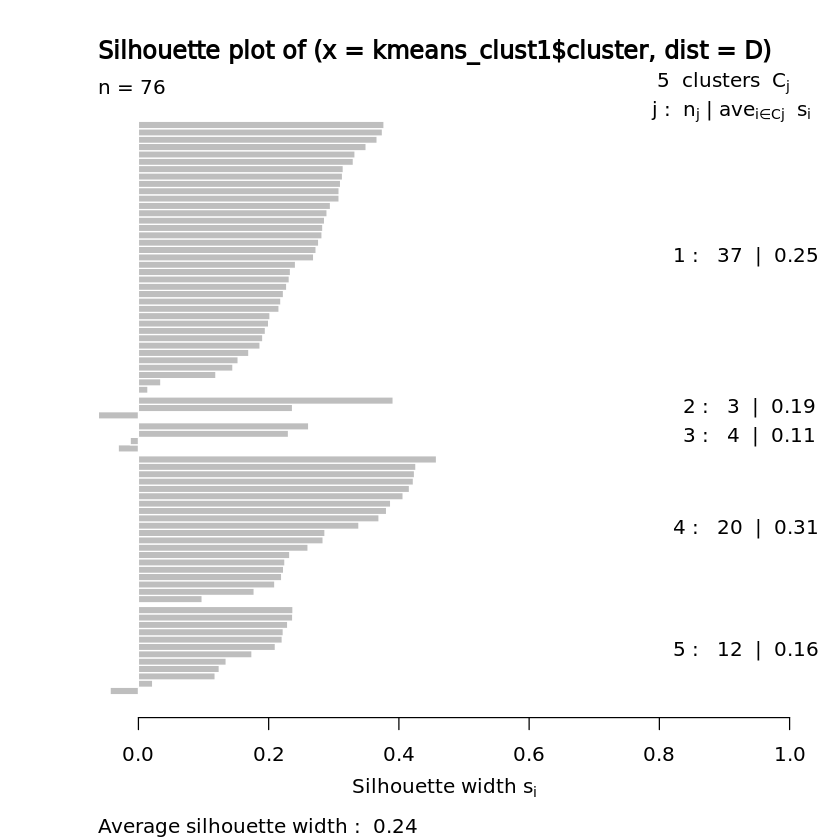

In [44]:
plot(sil_catch22_k1)

In [45]:
sil_catch22_k1_plot <- fviz_silhouette(sil_catch22_k1) + 
    ggtitle("Silhouette Width for Catch22-Based Clusters with K=5")
sil_catch22_k1_plot$layers[[2]]$aes_params$colour <- "black"

  cluster size ave.sil.width
1       1   37          0.25
2       2    3          0.19
3       3    4          0.11
4       4   20          0.31
5       5   12          0.16


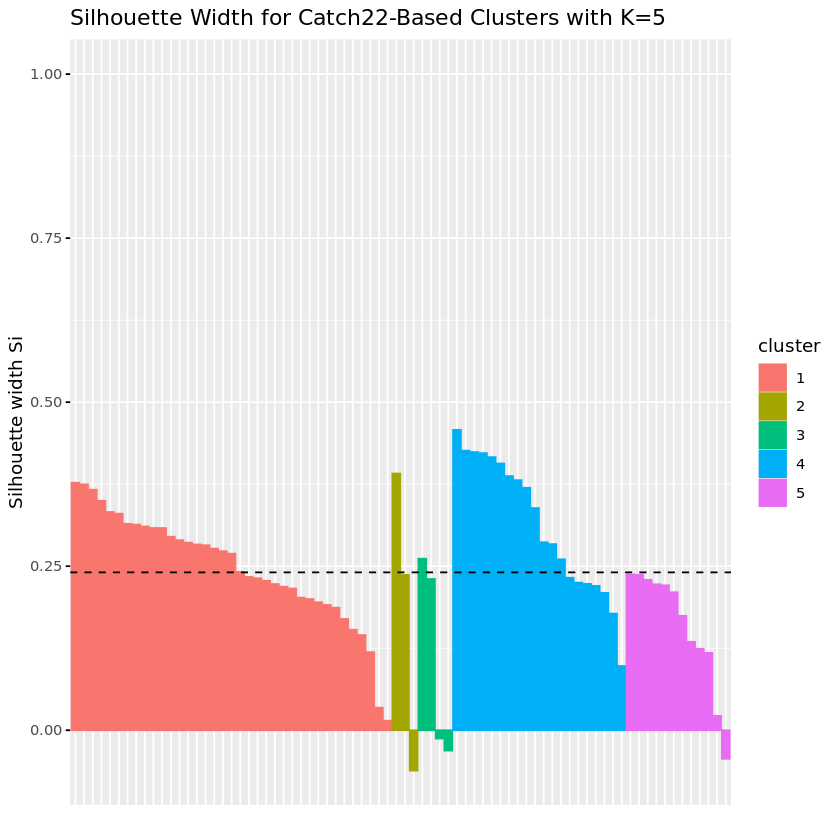

In [46]:
sil_catch22_k1_plot

In [47]:
ggsave("Results/Clustering/KMeans/avg_sil_catch22_k2.png", sil_catch22_k1_plot, width=10, height=5)

In [48]:
sil_catch22_k2 <- silhouette(kmeans_clust2$cluster, D)

sil_catch22_k2_plot <- fviz_silhouette(sil_catch22_k2) + 
    ggtitle("Silhouette Width for Catch22-Based Clusters with K=6")
sil_catch22_k2_plot$layers[[2]]$aes_params$colour <- "black"

  cluster size ave.sil.width
1       1   31          0.26
2       2    5          0.35
3       3    2          0.43
4       4   20          0.28
5       5   15          0.07
6       6    3          0.19


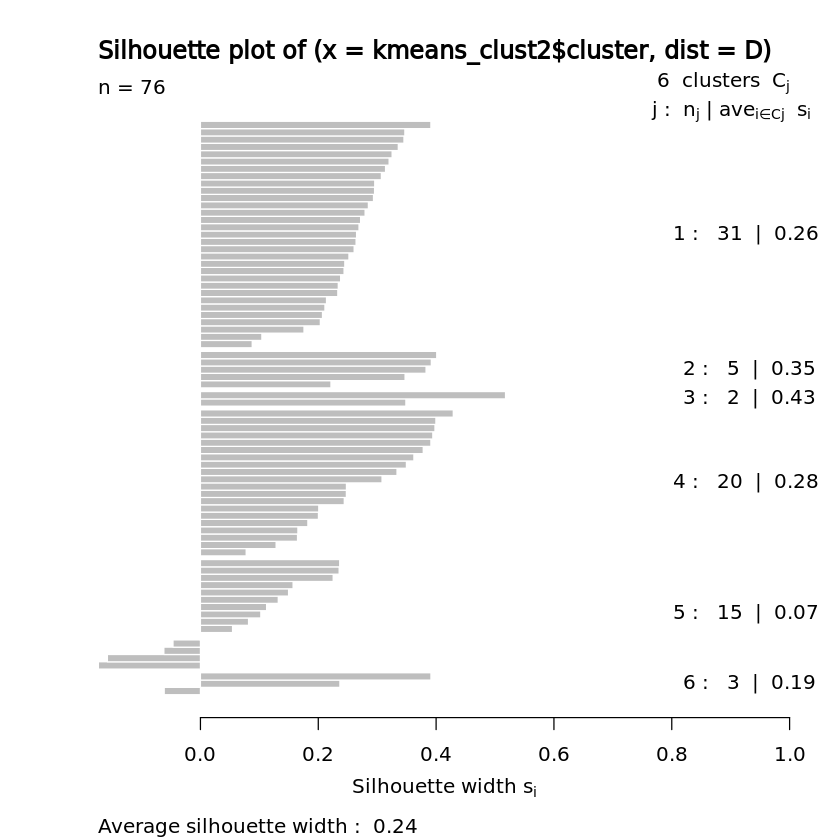

In [49]:
plot(sil_catch22_k2)

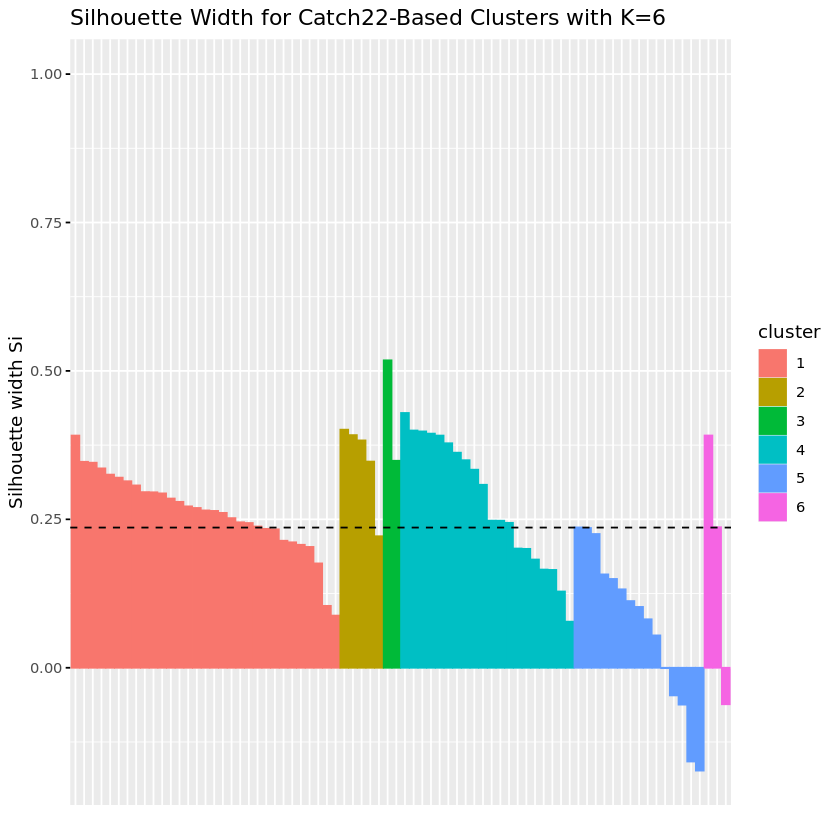

In [50]:
sil_catch22_k2_plot

In [51]:
ggsave("Results/Clustering/KMeans/avg_sil_catch22_k3.png", sil_catch22_k2_plot, width=10, height=5)

We proceed with K=5, as it is the simpler choice with slighly better performance

In [52]:
# Create the final clusters with k=3

# Set seed
set.seed(54321)

# Set K
kfinal <- 5

# Create the clusters
kmeans_final <- kmeans(train_catch22_feat_df_scaled, kfinal, 
                       iter.max=10000, nstart=500, algorithm="Hartigan-Wong") 

In [53]:
# Save the cluster results in an RData file for future use
saveRDS(kmeans_final, 
        file="Results/Clustering/KMeans/kmeans_catch22.RData")

In [54]:
# Sanity check the clusters
kmeans_final$cluster

[1] 4 1 1 4 4 1 1 1 1 1 5 4 1 1 4 4 4 1 2 5 5 1 4 4 4 4 5 4 1 4 5 4 1 1 1 4 4 4
[39] 1 1 1 5 5 1 5 5 1 1 3 1 1 1 5 3 1 5 5 1 1 4 4 3 3 4 1 1 1 2 2 1 1 1 1 1 1 1

In [55]:
# Re-format cluster assignments into a data frame with a ts_index field for joining later
kmeans_clust_df <- data.frame(ts_index=1:length(kmeans_final$cluster), 
                              kmeans_catch22_clust_assign=kmeans_final$cluster)

In [56]:
head(kmeans_clust_df)

,ts_index,kmeans_catch22_clust_assign
,<int>,<int>
1,1,4
2,2,1
3,3,1
4,4,4
5,5,4
6,6,1


In [57]:
# Save that df to a csv file
write.csv(kmeans_clust_df, 
          "Results/Clustering/KMeans/kmeans_catch22_clustering_assign.csv", 
          row.names=FALSE)

# TSFeatures Computation  
Next, we will compute features using the tsfeatures function

In [58]:
# Compute basic set of tsfeatures - 
# Set scale to FALSE as to not scale the time series before computing the features
ts_feat_list <- tsfeatures(train_samples_ts, scale=FALSE)

In [59]:
# Sanity check and inspect the summary
head(ts_feat_list)

frequency,nperiods,seasonal_period1,seasonal_period2,trend,spike,linearity,curvature,e_acf1,e_acf10,⋯,trough1,trough2,entropy,x_acf1,x_acf10,diff1_acf1,diff1_acf10,diff2_acf1,diff2_acf10,seas_acf1
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
672,2,96,672,0.04524545,1.7871660,401.41853,-70.57600,0.8260487,3.9629383,⋯,44,357,0.6668819,0.9805245,6.359669,0.062382170,0.23763458,-0.6324652,0.4378136,0.8142246
672,2,96,672,0.03397202,0.1025198,51.03854,65.12821,0.4686588,0.6192512,⋯,79,2,0.6373192,0.9691490,6.666140,-0.142832055,0.05915397,-0.6091203,0.3868450,0.8416136
672,2,96,672,0.07414295,0.1453130,109.43050,289.22413,0.4314831,0.3724309,⋯,31,375,0.6242515,0.9766606,7.098263,-0.101996517,0.07086743,-0.5910288,0.3578037,0.8420068
672,2,96,672,0.04656582,2.8257168,-300.58885,14.81884,0.5182204,0.6470061,⋯,95,20,0.6476451,0.9825183,6.572835,0.123384277,0.23594217,-0.6188357,0.4237040,0.8603121
672,2,96,672,0.32395416,0.2786917,691.13302,-57.02537,0.4035557,0.6414066,⋯,35,633,0.5452204,0.9863194,7.482607,0.015309680,0.21314835,-0.6136182,0.3911170,0.8586035
672,2,96,672,0.08106612,3.2968714,146.63715,576.99568,0.7109443,2.1812341,⋯,35,245,0.5721557,0.9856025,7.505656,-0.001428731,0.17599982,-0.6095278,0.3944185,0.8349258


In [60]:
summary(ts_feat_list)

   frequency      nperiods seasonal_period1 seasonal_period2     trend        
 Min.   :672   Min.   :2   Min.   :96       Min.   :672      Min.   :0.02012  
 1st Qu.:672   1st Qu.:2   1st Qu.:96       1st Qu.:672      1st Qu.:0.07360  
 Median :672   Median :2   Median :96       Median :672      Median :0.13166  
 Mean   :672   Mean   :2   Mean   :96       Mean   :672      Mean   :0.16886  
 3rd Qu.:672   3rd Qu.:2   3rd Qu.:96       3rd Qu.:672      3rd Qu.:0.24688  
 Max.   :672   Max.   :2   Max.   :96       Max.   :672      Max.   :0.67756  
     spike           linearity          curvature             e_acf1      
 Min.   : 0.0001   Min.   :-1444.07   Min.   :-1144.412   Min.   :0.1459  
 1st Qu.: 0.0401   1st Qu.: -202.47   1st Qu.: -197.149   1st Qu.:0.4874  
 Median : 0.1535   Median :  107.91   Median :   -6.804   Median :0.5615  
 Mean   : 2.6742   Mean   :   86.56   Mean   :  -35.651   Mean   :0.5717  
 3rd Qu.: 1.4251   3rd Qu.:  425.55   3rd Qu.:  142.497   3rd Qu.:0.6813

In [61]:
# Check for features where the lower and upper quantiles and median are identical - these likely do not provide
# enough useful information to include them for clustering
rownames(data.frame(t(sapply(ts_feat_list, function(i) quantile(i, c(0.25, 0.5, 0.75))))) %>%
    mutate(is_lower_equal_med = ifelse(X25.==X50., TRUE, FALSE)) %>%
    mutate(is_upper_equal_med = ifelse(X50.==X75., TRUE, FALSE)) %>%
    mutate(all_same = is_lower_equal_med+is_upper_equal_med) %>%
    filter(all_same==2))

[1] "frequency"        "nperiods"         "seasonal_period1" "seasonal_period2"

In [62]:
# Remove features with very low variation
ts_feat_list <- ts_feat_list%>% select(-c(frequency, nperiods, seasonal_period1, seasonal_period2))

In [63]:
write.csv(ts_feat_list, "Results/Clustering/KMeans/tsfeat_feat_df.csv")

In [64]:
# Scale features to unit interval to be consistent with how we used Catch22 features
ts_feat_list_df_scaled <- ts_feat_list

# Scale by looping through each feature and subtracting the min and dividing by the range
for (n in 1:ncol(ts_feat_list_df_scaled)){
    min_n <- min(ts_feat_list_df_scaled[,n])
    max_n <- max(ts_feat_list_df_scaled[,n])
    ts_feat_list_df_scaled[,n] <- (ts_feat_list_df_scaled[,n] - min_n)/(max_n - min_n)
}

## K-Means Clustering with TS Features

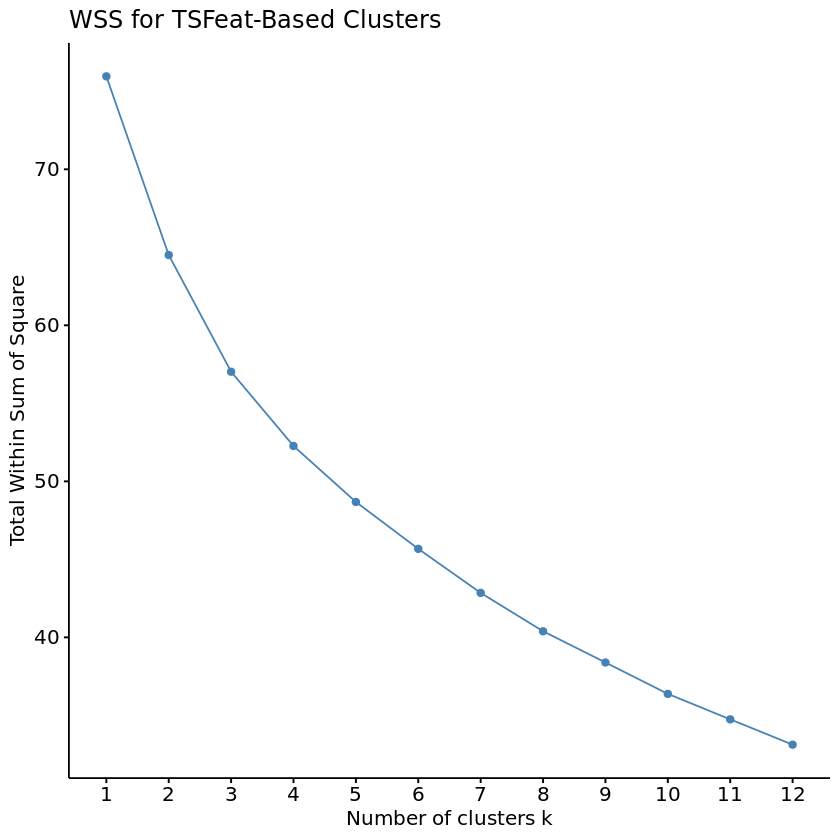

In [65]:
# Cluster using the Eblow Method based on WSS
set.seed(54321)
wss_tsfeat <- fviz_nbclust(ts_feat_list_df_scaled, 
             kmeans, 
             method = "wss", 
             k.max=12, 
             iter.max=1000, 
             nstart=100, 
             algorithm="Hartigan-Wong") + 
labs(title="WSS for TSFeat-Based Clusters")

wss_tsfeat
# No clear best number

In [66]:
ggsave("Results/Clustering/KMeans/wss_tsfeat.png", wss_tsfeat, width=10, height=5)

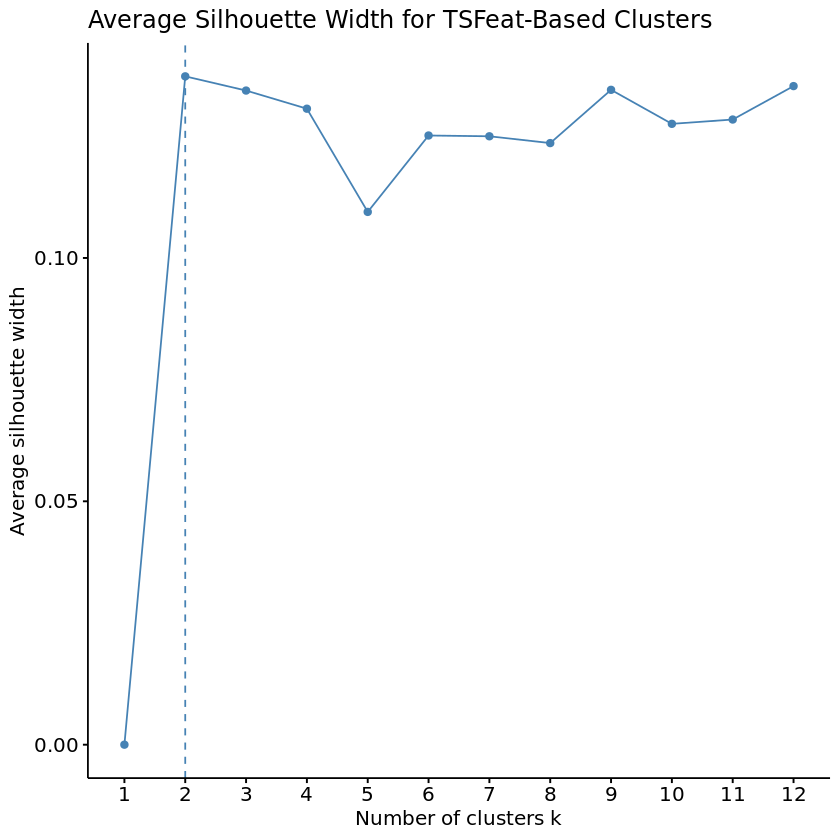

In [67]:
# Let's try the silhouette method instead
set.seed(54321)
sil_tsfeat <- fviz_nbclust(ts_feat_list_df_scaled,  
             kmeans, 
             method="silhouette", 
             k.max=12, 
             iter.max=10000, 
             nstart=500, 
             algorithm="Hartigan-Wong") + 
labs(title="Average Silhouette Width for TSFeat-Based Clusters")

sil_tsfeat
# Much clearer indication of 6 being optimal, with 3 another potential option

In [68]:
ggsave("Results/Clustering/KMeans/sil_tsfeat.png", sil_tsfeat, width=10, height=5)

In [69]:
# Inspect further results for 3 best looking options
# Choose the K's
k1 <- 2
k2 <- 3

# Create the clusters
set.seed(54321)
kmeans_clust1 <- kmeans(ts_feat_list_df_scaled, 
                        k1, iter.max=10000, nstart=500, algorithm="Hartigan-Wong") 
set.seed(54321)
kmeans_clust2 <- kmeans(ts_feat_list_df_scaled, 
                        k2, iter.max=10000, nstart=500, algorithm="Hartigan-Wong")  

In [70]:
# Compute distance matrix
D <- dist(ts_feat_list_df_scaled) # daisy(ts_feat_list_df_scaled)

In [71]:
sil_tsfeat_k1 <- silhouette(kmeans_clust1$cluster, D) 

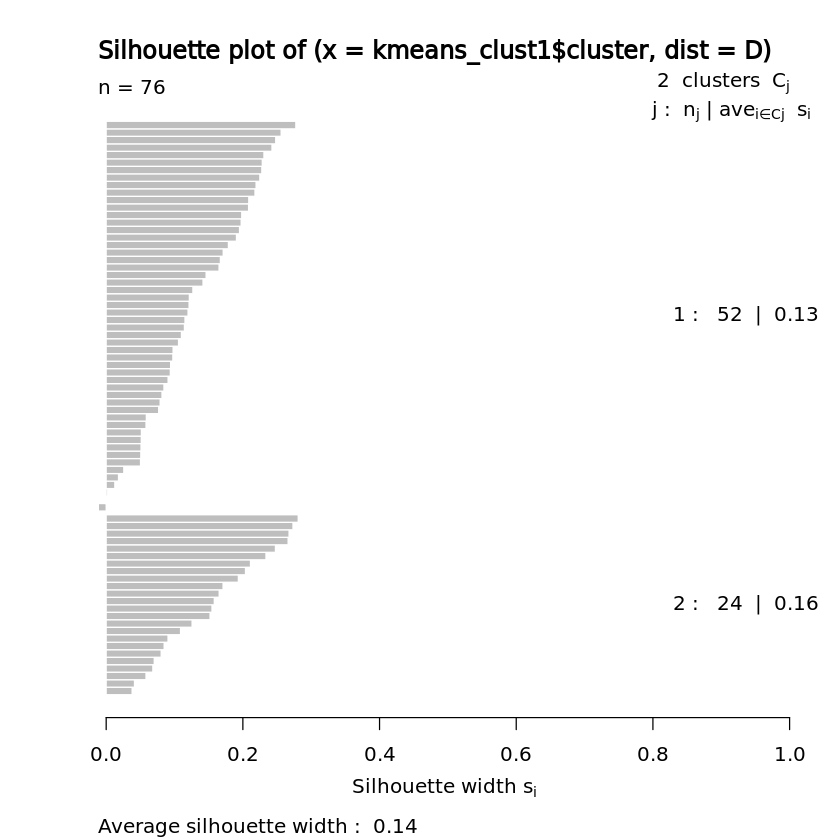

In [72]:
plot(sil_tsfeat_k1)

  cluster size ave.sil.width
1       1   52          0.13
2       2   24          0.16


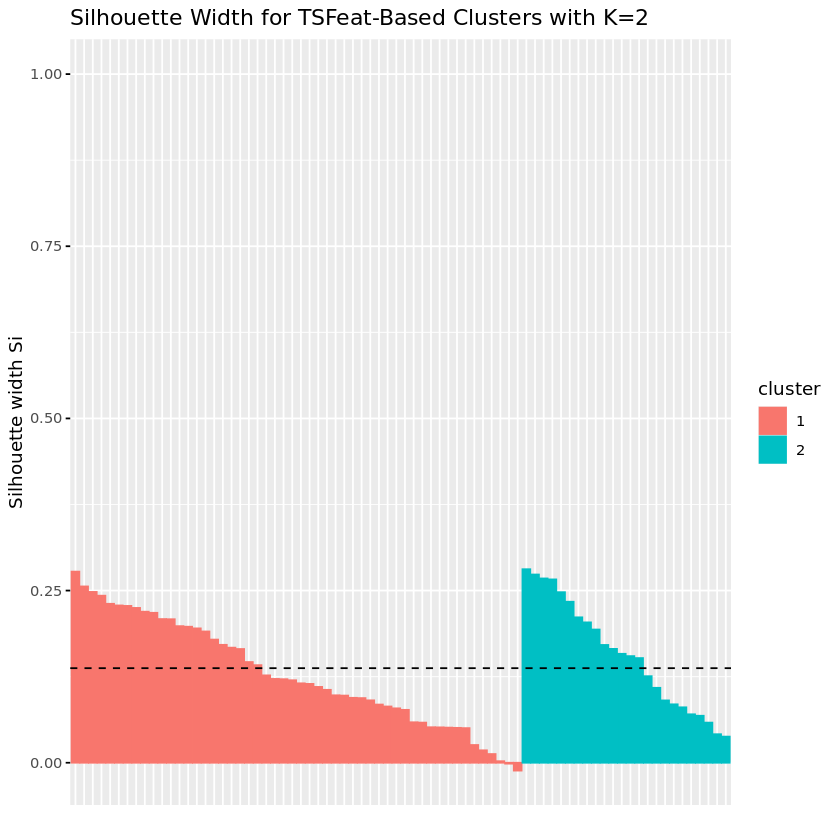

In [73]:
sil_tsfeat_k1_plot <- fviz_silhouette(sil_tsfeat_k1) + 
    ggtitle("Silhouette Width for TSFeat-Based Clusters with K=2")
sil_tsfeat_k1_plot$layers[[2]]$aes_params$colour <- "black"

sil_tsfeat_k1_plot

In [74]:
ggsave("Results/Clustering/KMeans/avg_sil_tsfeat_k2.png", sil_tsfeat_k1_plot, width=10, height=5)

In [75]:
sil_tsfeat_k2 <- silhouette(kmeans_clust2$cluster, D) 

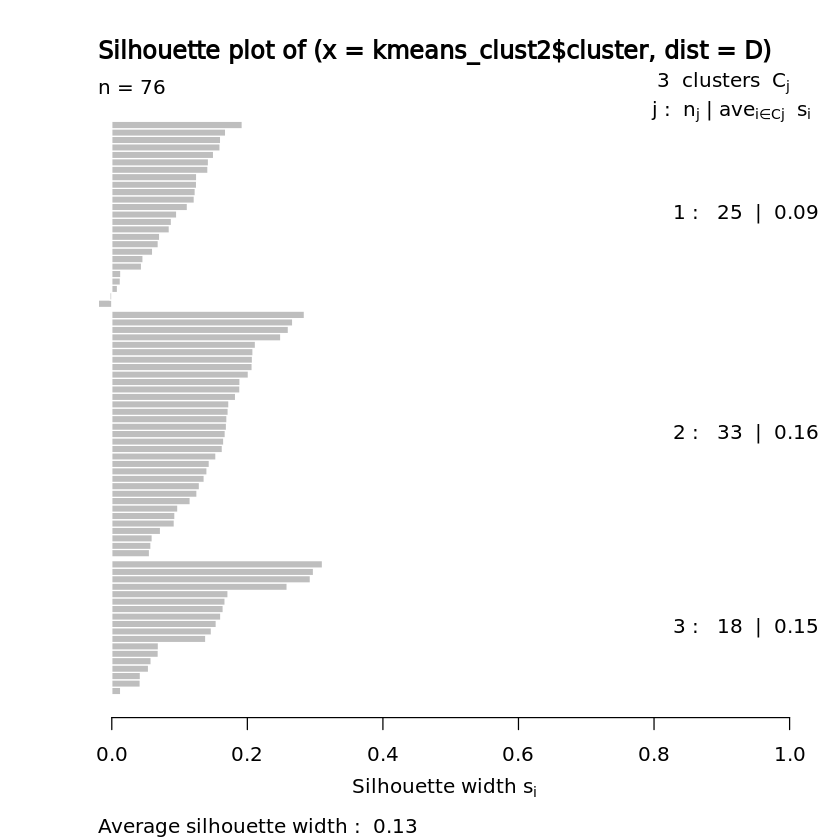

In [76]:
plot(sil_tsfeat_k2)

  cluster size ave.sil.width
1       1   25          0.09
2       2   33          0.16
3       3   18          0.15


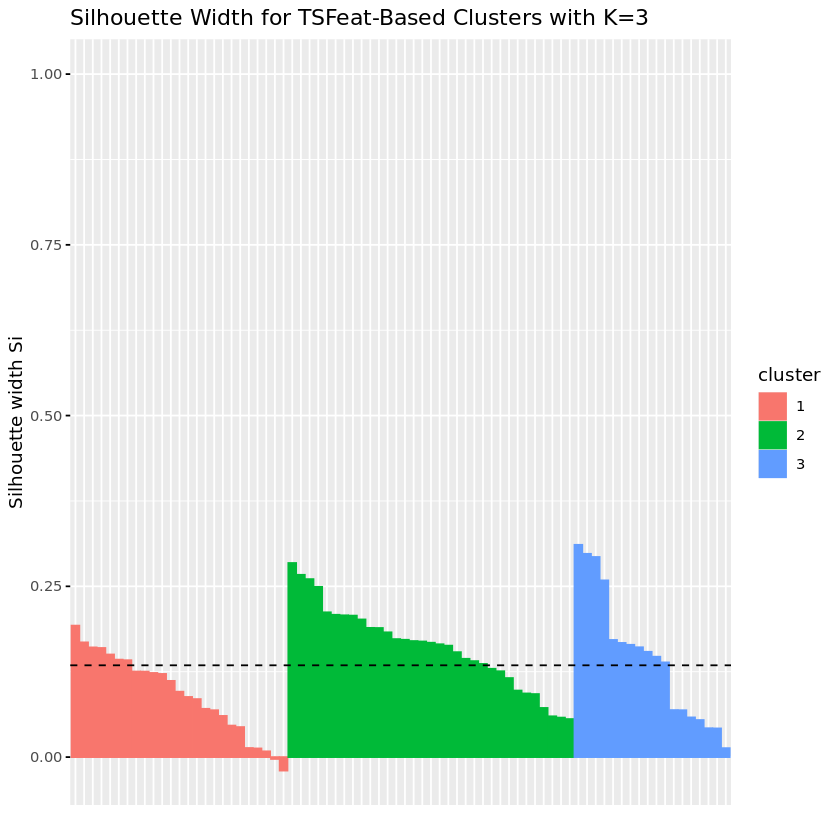

In [77]:
sil_tsfeat_k2_plot <- fviz_silhouette(sil_tsfeat_k2) + 
    ggtitle("Silhouette Width for TSFeat-Based Clusters with K=3")
sil_tsfeat_k2_plot$layers[[2]]$aes_params$colour <- "black"

sil_tsfeat_k2_plot

In [78]:
ggsave("Results/Clustering/KMeans/avg_sil_tsfeat_k3.png", sil_tsfeat_k2_plot, width=10, height=5)

In [79]:
# We choose k=2 - it is the simplest solution with the best average width
set.seed(54321)
kfinal <- 2
kmeans_final <- kmeans(ts_feat_list_df_scaled,
                       kfinal, iter.max=10000, nstart=500, algorithm="Hartigan-Wong") 

In [80]:
# Save the results in an RData file
saveRDS(kmeans_final, 
        file="Results/Clustering/KMeans/kmeans_tsfeat.RData")

In [81]:
# Print cluster assignments
kmeans_final$cluster

[1] 1 1 1 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 2 2 1 2 2 1 2 2 1 2 2 2 2 2 1 2 2 2 1 1 1 1 1 2 2 1 1 2 2 1 1 1 2 2 1 1 1 1

In [82]:
# Format cluster assignments into a df
kmeans_clust_df <- data.frame(ts_index=1:length(kmeans_final$cluster), 
                              kmeans_tsfeat_clust_assign=kmeans_final$cluster)

In [83]:
head(kmeans_clust_df)

,ts_index,kmeans_tsfeat_clust_assign
,<int>,<int>
1,1,1
2,2,1
3,3,1
4,4,1
5,5,1
6,6,1


In [84]:
# Save the df to a csv file for future use
write.csv(kmeans_clust_df, 
          "Results/Clustering/KMeans/kmeans_tsfeat_clustering_assign.csv", 
          row.names=FALSE)

# K-Medoids Clustering on Raw Time Series

In [85]:
# Create pam (medoids) clusters using the dtw distance metric between the raw time series rather than computing
# features first. We try K=2:12 to find an optimal value
dtw_clusters <- tsclust(train_samples_ts, 
                        k=2:12, 
                        type="partitional", 
                        distance = "dtw_basic", 
                        centroid = "pam",
                        seed=54321,
                        trace=TRUE
                       )


	Precomputing distance matrix...



Repetition 1 for k = 2



Iteration 1: Changes / Distsum = 76 / 48882793
Iteration 2: Changes / Distsum = 13 / 29522034
Iteration 3: Changes / Distsum = 9 / 27466548
Iteration 4: Changes / Distsum = 11 / 25081948
Iteration 5: Changes / Distsum = 8 / 21838090
Iteration 6: Changes / Distsum = 2 / 21178702
Iteration 7: Changes / Distsum = 0 / 21178702



Repetition 1 for k = 3



Iteration 1: Changes / Distsum = 76 / 21366880
Iteration 2: Changes / Distsum = 1 / 17977236
Iteration 3: Changes / Distsum = 0 / 17977236



Repetition 1 for k = 4



Iteration 1: Changes / Distsum = 76 / 28403230
Iteration 2: Changes / Distsum = 18 / 17309848
Iteration 3: Changes / Distsum = 1 / 17198462
Iteration 4: Changes / Distsum = 0 / 17198462



Repetition 1 for k = 5



Iteration 1: Changes / Distsum = 76 / 22398099
Iteration 2: Changes / Distsum = 10 / 16667736
Iteration 3: Changes / Distsum = 0 / 16667736



Repetition 1 for k = 6



Iteration 1: Changes / Distsum = 76 / 20058729
Iteration 2: Changes / Distsum = 13 / 16217950
Iteration 3: Changes / Distsum = 7 / 14919477
Iteration 4: Changes / Distsum = 5 / 14858180
Iteration 5: Changes / Distsum = 0 / 14858180



Repetition 1 for k = 7



Iteration 1: Changes / Distsum = 76 / 18907562
Iteration 2: Changes / Distsum = 10 / 15931280
Iteration 3: Changes / Distsum = 6 / 15684996
Iteration 4: Changes / Distsum = 0 / 15684996



Repetition 1 for k = 8



Iteration 1: Changes / Distsum = 76 / 18409872
Iteration 2: Changes / Distsum = 19 / 15431546
Iteration 3: Changes / Distsum = 12 / 14226661
Iteration 4: Changes / Distsum = 1 / 13968878
Iteration 5: Changes / Distsum = 0 / 13968878



Repetition 1 for k = 9



Iteration 1: Changes / Distsum = 76 / 16144896
Iteration 2: Changes / Distsum = 10 / 15083237
Iteration 3: Changes / Distsum = 3 / 14971431
Iteration 4: Changes / Distsum = 0 / 14971431



Repetition 1 for k = 10



Iteration 1: Changes / Distsum = 76 / 16555205
Iteration 2: Changes / Distsum = 24 / 13096320
Iteration 3: Changes / Distsum = 1 / 13068710
Iteration 4: Changes / Distsum = 2 / 13024572
Iteration 5: Changes / Distsum = 0 / 13024572



Repetition 1 for k = 11



Iteration 1: Changes / Distsum = 76 / 24976178
Iteration 2: Changes / Distsum = 11 / 16155206
Iteration 3: Changes / Distsum = 4 / 15787392
Iteration 4: Changes / Distsum = 0 / 15726653



Repetition 1 for k = 12



Iteration 1: Changes / Distsum = 76 / 13714237
Iteration 2: Changes / Distsum = 17 / 12602140
Iteration 3: Changes / Distsum = 3 / 12556903
Iteration 4: Changes / Distsum = 0 / 12556903

	Elapsed time is 145.714 seconds.



In [86]:
# Create a list of cluster quality for each K
dtw_cluster_quality <- lapply(dtw_clusters, cvi)

In [87]:
# Turn that list into a df
dtw_cluster_quality_df <- data.frame(do.call("rbind", dtw_cluster_quality))

In [88]:
dtw_cluster_quality_df

Sil,SF,CH,DB,DBstar,D,COP
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.66834012,0,93.51513,0.5703287,0.5703287,0.09323396,0.19186189
0.45474960,0,62.41023,1.0821090,1.8284635,0.07488925,0.13339877
0.32363901,0,42.98229,1.0567137,2.1596081,0.06367784,0.11717964
0.24637949,0,33.63636,1.5064870,2.6408581,0.07232007,0.10498518
0.21766076,0,31.93582,1.3445337,3.0488670,0.12060646,0.09681783
0.22508008,0,22.83161,1.3174245,2.8535753,0.06239187,0.09921761
0.24032627,0,24.34722,1.2918005,2.6816887,0.12060646,0.08321669
0.15022426,0,17.55772,1.4007202,2.9295874,0.05206966,0.09047485
0.13270301,0,18.81024,1.5543637,2.5671406,0.10442214,0.07827907


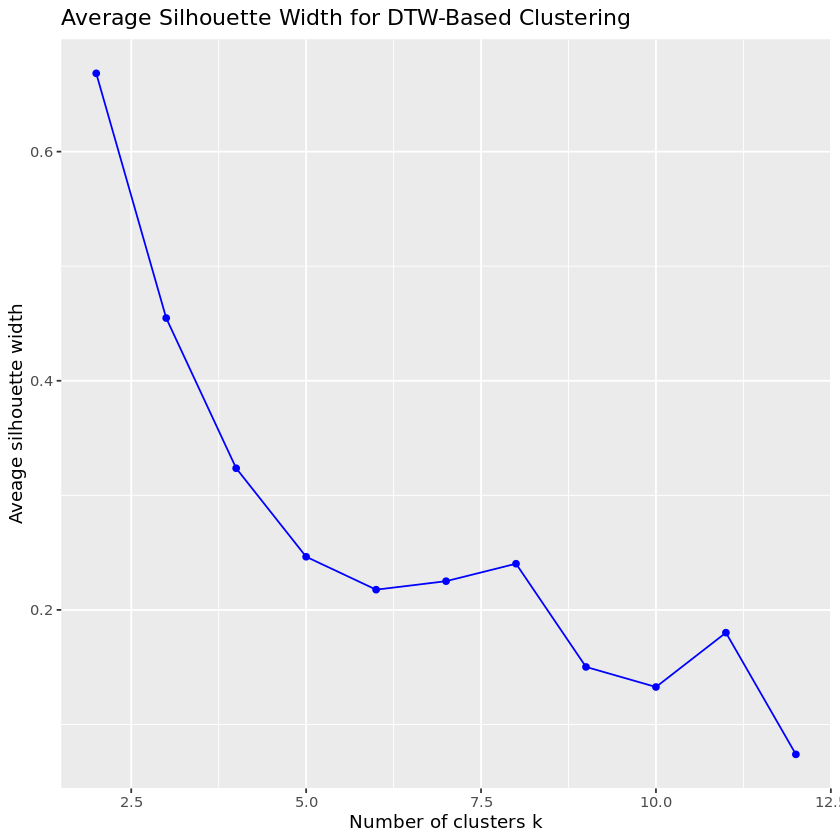

In [89]:
# Plot cluster quality to pick a K
dtw_clust_qual <- ggplot() + 
    geom_point(aes(x=2:12, y=dtw_cluster_quality_df$Sil), col='blue') + 
    geom_line(aes(x=2:12, y=dtw_cluster_quality_df$Sil), col='blue') +
    xlab("Number of clusters k") + 
    ylab("Aveage silhouette width") + 
    ggtitle("Average Silhouette Width for DTW-Based Clustering")
dtw_clust_qual

In [90]:
ggsave("Results/Clustering/DTW/dtw_clust_qual.png", dtw_clust_qual, width=10, height=5)

In [91]:
# Based on the above, we choose K=2 as our final K
# Create the final clusters with K=2
final_dtw_clust <- tsclust(train_samples_ts,
                           k=2, 
                           type="partitional", 
                           distance = "dtw_basic", 
                           centroid = "pam",
                           seed=54321,
                           trace=TRUE
                       )


	Precomputing distance matrix...

Iteration 1: Changes / Distsum = 76 / 48882793
Iteration 2: Changes / Distsum = 13 / 29522034
Iteration 3: Changes / Distsum = 9 / 27466548
Iteration 4: Changes / Distsum = 11 / 25081948
Iteration 5: Changes / Distsum = 8 / 21838090
Iteration 6: Changes / Distsum = 2 / 21178702
Iteration 7: Changes / Distsum = 0 / 21178702

	Elapsed time is 145.18 seconds.



In [92]:
# Inspect cluster results
final_dtw_clust

partitional clustering with 2 clusters
Using dtw_basic distance
Using pam centroids

Time required for analysis:
    user   system  elapsed 
2264.315    1.126  145.180 

Cluster sizes with average intra-cluster distance:

  size  av_dist
1   25 437202.5
2   51 200953.7

In [93]:
# Save results in RData files
saveRDS(final_dtw_clust, file="Results/Clustering/DTW/dtw_clust.RData")

In [94]:
# Extract the clusters assignments
dtw_clust_assign <- final_dtw_clust@cluster

In [95]:
# Save the assignments into a df
dtw_clust_df <- data.frame(ts_index=1:length(dtw_clust_assign), 
                           dtw_clust_assign=dtw_clust_assign
                          )

In [96]:
head(dtw_clust_df)

,ts_index,dtw_clust_assign
,<int>,<int>
1,1,2
2,2,2
3,3,2
4,4,1
5,5,1
6,6,1


In [97]:
# Save that df to a csv file
write.csv(dtw_clust_df, "Results/Clustering/DTW/dtw_clustering_assign.csv", row.names=FALSE)